In [1]:
import razor
import razor.flow as rf
from razor import api
from razor.flow.spark import SparkBlock, SparkExecutor
import typing as t

In [2]:
import os
from datetime import datetime, timedelta
from pyspark.sql import SparkSession, functions
from pyspark.sql.dataframe import DataFrame
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

In [3]:

from razor.project.blocks.sourya_spark_blocks import NonSparkCols
from razor.project.blocks.sourya_spark_blocks import ReadCsvProjectSpace
from razor.project.blocks.sourya_spark_blocks import NonSparkPath
from razor.project.blocks.sourya_spark_blocks import DropDuplicates
from razor.project.blocks.sourya_spark_blocks import RenameCol
from razor.project.blocks.sourya_spark_blocks import ConcatData
from razor.project.blocks.sourya_spark_blocks import SelectDataDescribe
from razor.project.blocks.sourya_spark_blocks import SelectData
from razor.project.blocks.sourya_spark_blocks import ReadCsvProjectSpaceETA

In [4]:
def project_space_path(path):
    ps = api.datasources('Project Space')
    return os.path.join(ps.abspath(), path)


In [5]:
# @rf.block
# class NonSparkPath:
#     # Atomic input - csv filename relative to project space
#     ip_path: str
#     selected_cols: rf.Output[t.Any]
#     # Atomic output of type spark DataFrame.
#     op_path: rf.Output[str]
#     def run(self):
#         self.op_path.put(project_space_path(self.ip_path))
        
# @rf.block
# class NonSparkCols:
#     cols_list: t.Any
#     # Atomic input - csv filename relative to project space
#     selected_cols: rf.Output[t.Any]
#     # Atomic output of type spark DataFrame.
#     def run(self):
#         self.selected_cols.put(self.cols_list)
        
        

In [6]:
# @rf.block
# class ReadCsvProjectSpace(SparkBlock):
#     filename:str
#     data: rf.Output[DataFrame]
#     def run(self):
#         df = self.spark.read.csv(self.filename, header = True)
#         print("Data Schema")
#         df.printSchema()
#         self.data.put(df)
        

# @rf.block
# class SelectData(SparkBlock):
#     wanted_cols: t.Any
#     inputData: DataFrame
#     outputData: rf.Output[DataFrame]
#     def run(self):
#         df = self.inputData
#         df_selected = df.select(self.wanted_cols)
#         df_selected.show()
#         self.outputData.put(df_selected)
        
        
        
# @rf.block
# class ConcatData(SparkBlock):
#     inputData_1: DataFrame
#     inputData_2: DataFrame
#     outputData: rf.Output[DataFrame]
#     def run(self):
#         df_concat = self.inputData_1.union(self.inputData_1)
#         print("Concat Data")
#         df_concat.show()
#         self.outputData.put(df_concat)
        

# @rf.block
# class RenameCol(SparkBlock):
#     inputData: DataFrame
#     col_dic: t.Any
#     outputData: rf.Output[DataFrame]
#     def run(self):
#         df_rename = self.inputData.withColumnRenamed(list(self.col_dic.keys())[0], self.col_dic[list(self.col_dic.keys())[0]])
#         df_rename = df_rename.withColumnRenamed(list(self.col_dic.keys())[1], self.col_dic[list(self.col_dic.keys())[1]])
#         self.outputData.put(df_rename)
      

# @rf.block
# class DropDuplicates(SparkBlock):
#     inputData: DataFrame
#     outputData: rf.Output[DataFrame]
#     def run(self):
#         df_clean = self.inputData.dropDuplicates()
#         print('final dataframe')
#         df_clean.show()
#         self.outputData.put(df_clean)     
        


In [7]:
nsp = NonSparkPath(ip_path='df_with_stats.csv')
nsp1 = NonSparkPath(ip_path='train_hatespeech.csv')

nsc = NonSparkCols(cols_list = ['title','label'])
nsc1 = NonSparkCols(cols_list = ['tweet','class'])

rcp = ReadCsvProjectSpace(filename = nsp.op_path, config={}, source="")
rcp1 = ReadCsvProjectSpace(filename = nsp1.op_path, config={}, source="")

sd = SelectData(wanted_cols=nsc.selected_cols, inputData=rcp.data, config={}, source="")
sd1 = SelectData(wanted_cols=nsc1.selected_cols, inputData=rcp1.data, config={}, source="")
rc = RenameCol(inputData=sd1.outputData,col_dic={'tweet': 'title', 'class': 'label'})
cd = ConcatData(inputData_1=sd.outputData,inputData_2=rc.outputData)
cd1 = ConcatData(inputData_1=cd.outputData,inputData_2=sd.outputData)
dd = DropDuplicates(inputData=cd1.outputData)

# rcp.executor = rf.ProcessExecutor
# sd.executor = rf.ProcessExecutor
# rcp1.executor = rf.ProcessExecutor
# sd1.executor = rf.ProcessExecutor
# rc.executor = rf.ProcessExecutor
# cd.executor = rf.ProcessExecutor
# cd1.executor = rf.ProcessExecutor
# dd.executor = rf.ProcessExecutor

In [8]:
pipe = rf.Pipeline('pipeline_sd_4', targets = [dd])

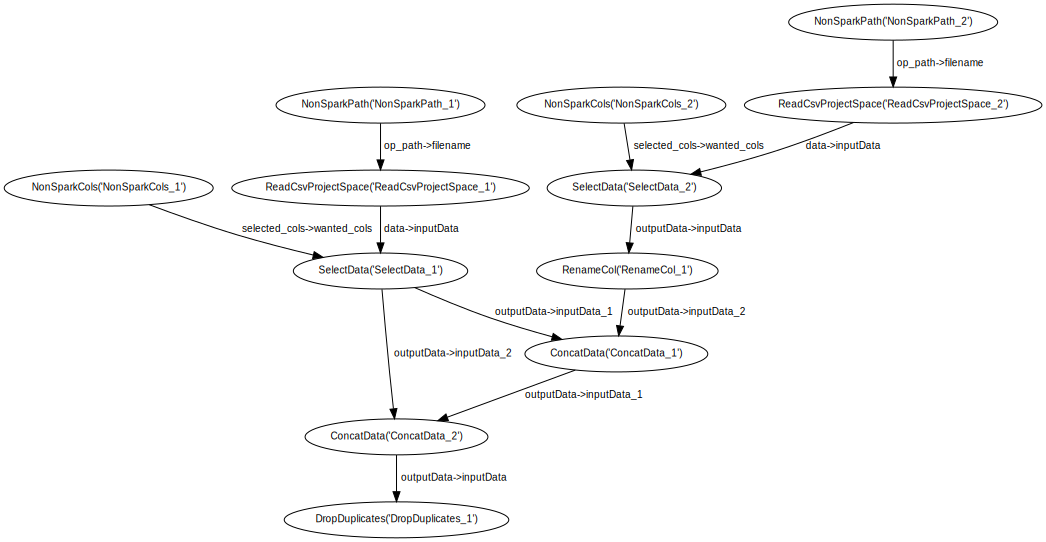

In [9]:
pipe.show()

In [10]:
pipe.execute()

log path: /tmp/tmpsd2in4qk/pipeline_sd_4


root
 |-- Unnamed: 0: string (nullable = true)
 |-- count: string (nullable = true)
 |-- hate_speech: string (nullable = true)
 |-- offensive_language: string (nullable = true)
 |-- neither: string (nullable = true)
 |-- class: string (nullable = true)
 |-- tweet: string (nullable = true)



{}